# Supply Chain Analysis: Solving Inventory Problems
## Analyzing Single Period (Newsvendor) Problems

In [1]:
# Libraries
#import math
import numpy as np
from scipy.stats import norm
from scipy import stats

import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import (AutoMinorLocator, MultipleLocator)

## Describe the newsvendor problem and approaches

Newsvendor comes from the idea that newspapers are only good for one day, and you, as the seller, have to determine how many to make or how many to buy from your supplier. If you make too many, you lose money from unsold inventory. However, if you make too few, you lose money from missed sales. So the idea is to balance those two risks. 

There are two basic approaches to analyzing a newsvendor problem. The first is to create a **data table**, and there you explicitly calculate profit from each demand and order quantity scenario. So you might have a demand of 200, but if you made 2,000 of your items, such as t-shirts for a conference, then you will have a lot of unsold inventory that you're not able to sell later. The data table will show you how much the total profit changes as well. 

You can also analyze the problem **analytically**. This identifies the specific order quantity with the highest expected profit. However, it might not be possible to order exactly that amount. If your calculation tells you to order 1991.5 t-shirts, for example, you won't be able to order exactly that amount. In fact, you might have to order in increments of 100. Your question then should be how to identify the best order quantity. 

Well first off, best is a matter of judgment, it's not just math. Customer service and goodwill goes a long way. If your customers will be disappointed that they can't buy your t-shirt, then it makes sense to order more than you think you might need to ensure the customers aren't disappointed. And finally, you can also add salvage value to your calculations. If you want to sell a t-shirt for $20, but after the conference is over you might be able to sell it for five, as an add on to another order, then you can include that and use it in your calculations to decrease the loss from your excess inventory. It doesn't seem like newsvendor problems would come up that often, but in fact they're very common.

## Set up to identify maximum profit

When you are faced with a news-vendor problem, you assume that you want to sell items that are only in demand for a short time. One way to analyze this scenario is to create a table that calculates the expected profit for each demand and order quantity level. Let's assume it's t-shirts sold for a conference.

In [2]:
# Expected Profit Table

mean = 1800              # the Mean of the expected demand
std_dev = 600            # the Standard Deviation of this mean

price = 20               # t-shirt Sale Price
cost =  7.50             # t-shirt Cost

order_quantity = np.array([1000,1200,1400,1600,1800,2000,2200,2400,2600,2800])          # Number of t-shirts that you can order
demand = np.array([200,400,600,800,1000,1200,1400,1600,1800,2000,2200,2400,2600,2800])  # Demand range

# Cumulative Probability
cum_prob = np.zeros(14)
i = 0
for x in demand:
    cum_prob[i] = round(stats.norm.cdf(x, 1800, 600),8)
    i += 1
    
# Probability
probability = np.zeros(14)
m = 0
for x in cum_prob:
    if m == 0:
        probability[m] = x
    elif m == 13:
        probability[m] = 1 - cum_prob[12]    # probability that a value is greater than 2,600
    else: 
        probability[m] = x - cum_prob[m-1]       
    m+=1

# Create a Data Frame
data4 = {'Cumulative': cum_prob, 
        'Demand': demand,
        'Probability': probability}

hoco = pd.DataFrame(data4)
#hoco = hoco.set_index('Cumulative')
hoco['Cumulative'] = hoco['Cumulative'].round(decimals = 4)
hoco['Demand'] = hoco['Demand'].round(decimals = 4)
hoco['Probability'] = hoco['Probability'].round(decimals = 4)
hoco

,Cumulative,Demand,Probability
0,0.0038,200,0.0038
1,0.0098,400,0.0060
2,0.0228,600,0.0129
3,0.0478,800,0.0250
4,0.0912,1000,0.0434
5,0.1587,1200,0.0674
6,0.2525,1400,0.0938
7,0.3694,1600,0.1169
8,0.5000,1800,0.1306
9,0.6306,2000,0.1306


## Calculationg the profit

We created an outline to determine the best quantity to order. So now it's time to calculate the expected profit for each combination of demand and order quantity.

In [3]:
order_quantity = np.array([1000,1200,1400,1600,1800,2000,2200,2400,2600,2800])    # Number of t-shirts that you can order

# 1000
m1000 = np.zeros(14)
i1 = 0
for x in m1000:
    if demand[i1] < 1000:
        m1000[i1] = price * demand[i1] - cost * 1000
    else:
        m1000[i1] = price * 1000 - cost * 1000   
    i1+=1

# 1200
m1200 = np.zeros(14)
i2 = 0
for x in m1200:
    if demand[i2] < 1200:
        m1200[i2] = price * demand[i2] - cost * 1200
    else:
        m1200[i2] = price * 1200 - cost * 1200   
    i2+=1
    
# 1400
m1400 = np.zeros(14)
i3 = 0
for x in m1400:
    if demand[i3] < 1400:
        m1400[i3] = price * demand[i3] - cost * 1400
    else:
        m1400[i3] = price * 1400 - cost * 1400   
    i3+=1

# 1600
m1600 = np.zeros(14)
i4 = 0
for x in m1600:
    if demand[i4] < 1600:
        m1600[i4] = price * demand[i4] - cost * 1600
    else:
        m1600[i4] = price * 1600 - cost * 1600   
    i4+=1
    
# 1800
m1800 = np.zeros(14)
i5 = 0
for x in m1800:
    if demand[i5] < 1800:
        m1800[i5] = price * demand[i5] - cost * 1800
    else:
        m1800[i5] = price * 1800 - cost * 1800   
    i5+=1

# 2000
m2000 = np.zeros(14)
i6 = 0
for x in m2000:
    if demand[i6] < 2000:
        m2000[i6] = price * demand[i6] - cost * 2000
    else:
        m2000[i6] = price * 2000 - cost * 2000   
    i6+=1


# 2200
m2200 = np.zeros(14)
i7 = 0
for x in m2200:
    if demand[i7] < 2200:
        m2200[i7] = price * demand[i7] - cost * 2200
    else:
        m2200[i7] = price * 2200 - cost * 2200   
    i7+=1
    
# 2400
m2400 = np.zeros(14)
i8 = 0
for x in m2400:
    if demand[i8] < 2400:
        m2400[i8] = price * demand[i8] - cost * 2400
    else:
        m2400[i8] = price * 2400 - cost * 2400   
    i8+=1

# 2600
m2600 = np.zeros(14)
i9 = 0
for x in m2600:
    if demand[i9] < 2600:
        m2600[i9] = price * demand[i9] - cost * 2600
    else:
        m2600[i9] = price * 2600 - cost * 2600   
    i9+=1
    
# 2800
m2800 = np.zeros(14)
i10 = 0
for x in m2800:
    if demand[i10] < 2800:
        m2800[i10] = price * demand[i10] - cost * 2800
    else:
        m2800[i10] = price * 2800 - cost * 2800   
    i10+=1
    
# Create a Data Frame
data5 = {'Cumulative': cum_prob, 
        'Demand': demand,
        'Probability': probability,
        '1000': m1000,
        '1200': m1200,
        '1400': m1400,
        '1600': m1600,
        '1800': m1800,
        '2000': m2000,
        '2200': m2200,
        '2400': m2400,
        '2600': m2600,
        '2800': m2800}

moco = pd.DataFrame(data5)
moco['Cumulative'] = moco['Cumulative'].round(decimals = 4)
moco['Demand'] = moco['Demand'].round(decimals = 4)
moco['Probability'] = moco['Probability'].round(decimals = 4)
moco

,Cumulative,Demand,Probability,1000,1200,1400,1600,1800,2000,2200,2400,2600,2800
0,0.0038,200,0.0038,-3500.0,-5000.0,-6500.0,-8000.0,-9500.0,-11000.0,-12500.0,-14000.0,-15500.0,-17000.0
1,0.0098,400,0.0060,500.0,-1000.0,-2500.0,-4000.0,-5500.0,-7000.0,-8500.0,-10000.0,-11500.0,-13000.0
2,0.0228,600,0.0129,4500.0,3000.0,1500.0,0.0,-1500.0,-3000.0,-4500.0,-6000.0,-7500.0,-9000.0
3,0.0478,800,0.0250,8500.0,7000.0,5500.0,4000.0,2500.0,1000.0,-500.0,-2000.0,-3500.0,-5000.0
4,0.0912,1000,0.0434,12500.0,11000.0,9500.0,8000.0,6500.0,5000.0,3500.0,2000.0,500.0,-1000.0
5,0.1587,1200,0.0674,12500.0,15000.0,13500.0,12000.0,10500.0,9000.0,7500.0,6000.0,4500.0,3000.0
6,0.2525,1400,0.0938,12500.0,15000.0,17500.0,16000.0,14500.0,13000.0,11500.0,10000.0,8500.0,7000.0
7,0.3694,1600,0.1169,12500.0,15000.0,17500.0,20000.0,18500.0,17000.0,15500.0,14000.0,12500.0,11000.0
8,0.5000,1800,0.1306,12500.0,15000.0,17500.0,20000.0,22500.0,21000.0,19500.0,18000.0,16500.0,15000.0
9,0.6306,2000,0.1306,12500.0,15000.0,17500.0,20000.0,22500.0,25000.0,23500.0,22000.0,20500.0,19000.0


In [4]:
# Expected Value

e1000 = 0
k = 0
for x in m1000:
    e1000 = e1000 + m1000[k]*probability[k]
    k+=1

e1200 = 0
k1 = 0
for x in m1200:
    e1200 = e1200 + m1200[k1]*probability[k1]
    k1+=1

e1400 = 0
k2 = 0
for x in m1400:
    e1400 = e1400 + m1400[k2]*probability[k2]
    k2+=1

e1600 = 0
k3 = 0
for x in m1600:
    e1600 = e1600 + m1600[k3]*probability[k3]
    k3+=1    

e1800 = 0
k4 = 0
for x in m1800:
    e1800 = e1800 + m1800[k4]*probability[k4]
    k4+=1     

e2000 = 0
k5 = 0
for x in m2000:
    e2000 = e2000 + m2000[k5]*probability[k5]
    k5+=1  
    
e2200 = 0
k6 = 0
for x in m2200:
    e2200 = e2200 + m2200[k6]*probability[k6]
    k6+=1 

e2400 = 0
k7 = 0
for x in m2400:
    e2400 = e2400 + m2400[k7]*probability[k7]
    k7+=1 
    
e2600 = 0
k8 = 0
for x in m2600:
    e2600 = e2600 + m2600[k8]*probability[k8]
    k8+=1 

e2800 = 0
k9 = 0
for x in m2800:
    e2800 = e2800 + m2800[k9]*probability[k9]
    k9+=1    
    
e1000 = round(e1000)
e1200 = round(e1200)
e1400 = round(e1400)
e1600 = round(e1600)
e1800 = round(e1800)
e2000 = round(e2000)
e2200 = round(e2200)
e2400 = round(e2400)
e2600 = round(e2600)
e2800 = round(e2800)

In [5]:
expected = np.array([0,0,0,e1000,e1200,e1400,e1600,e1800,e2000,e2200,e2400,e2600,e2800])

moco.loc['Expected'] = expected # Create a row
moco

,Cumulative,Demand,Probability,1000,1200,1400,1600,1800,2000,2200,2400,2600,2800
0,0.0038,200,0.0038,-3500.0,-5000.0,-6500.0,-8000.0,-9500.0,-11000.0,-12500.0,-14000.0,-15500.0,-17000.0
1,0.0098,400,0.0060,500.0,-1000.0,-2500.0,-4000.0,-5500.0,-7000.0,-8500.0,-10000.0,-11500.0,-13000.0
2,0.0228,600,0.0129,4500.0,3000.0,1500.0,0.0,-1500.0,-3000.0,-4500.0,-6000.0,-7500.0,-9000.0
3,0.0478,800,0.0250,8500.0,7000.0,5500.0,4000.0,2500.0,1000.0,-500.0,-2000.0,-3500.0,-5000.0
4,0.0912,1000,0.0434,12500.0,11000.0,9500.0,8000.0,6500.0,5000.0,3500.0,2000.0,500.0,-1000.0
5,0.1587,1200,0.0674,12500.0,15000.0,13500.0,12000.0,10500.0,9000.0,7500.0,6000.0,4500.0,3000.0
6,0.2525,1400,0.0938,12500.0,15000.0,17500.0,16000.0,14500.0,13000.0,11500.0,10000.0,8500.0,7000.0
7,0.3694,1600,0.1169,12500.0,15000.0,17500.0,20000.0,18500.0,17000.0,15500.0,14000.0,12500.0,11000.0
8,0.5000,1800,0.1306,12500.0,15000.0,17500.0,20000.0,22500.0,21000.0,19500.0,18000.0,16500.0,15000.0
9,0.6306,2000,0.1306,12500.0,15000.0,17500.0,20000.0,22500.0,25000.0,23500.0,22000.0,20500.0,19000.0


In [6]:
# Show Maximum profit

maximum = np.amax(expected)

print(maximum)

19176


We'll note that our optimum order level is 2000 with a maximum value of 19,176. However, note that our expected profit for buying 2200 shirts is only, it looks like $22 less. So if you're willing to invest in 200 extra shirts, you might make 200 people that much happier when they come to your conference.

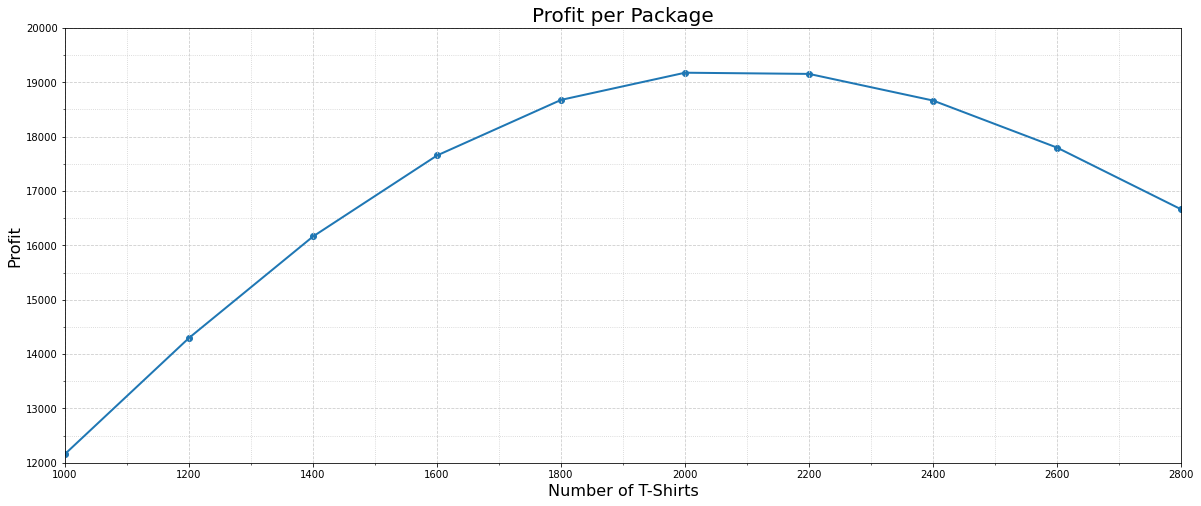

In [7]:
# Create a Graph

order_quantity = np.array([1000,1200,1400,1600,1800,2000,2200,2400,2600,2800])
profit = np.delete(expected, [0,1,2])


fig, ax = plt.subplots(figsize=(20, 8))

# Set axis ranges
ax.set_xlim(1000, 2800)
ax.set_ylim(12000, 20000)

# Change major ticks
ax.xaxis.set_major_locator(MultipleLocator(200))
ax.yaxis.set_major_locator(MultipleLocator(1000))

# Change minor ticks
ax.xaxis.set_minor_locator(AutoMinorLocator(2))
ax.yaxis.set_minor_locator(AutoMinorLocator(2))

# Turn grid on for both major and minor ticks and style minor slightly differently.
ax.grid(which='major', color='#CCCCCC', linestyle='--')
ax.grid(which='minor', color='#CCCCCC', linestyle=':')

plt.plot(order_quantity, profit, linewidth=2.0)
plt.scatter(order_quantity, profit)
plt.xlabel('Number of T-Shirts', fontsize = 16)               
plt.ylabel('Profit', fontsize = 16)         
plt.title('Profit per Package', fontsize = 20) 
plt.grid(True)
plt.show()

## Identify the optimal order quantity using marginal analysis